<a href="https://colab.research.google.com/github/TKLUSSMANN/ReCell/blob/main/Klussmann_ReCell_SupervisedLearningRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

### Abstract

In this project, we prepared data for modeling and built a linear regression model to predict used phone/tablet prices. We took into consideration both under and over fitting and we also sought to find a model that maximized both simplicity and accuracy.

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [ ]:
# allows google colab to access google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loads the used device data set
data = pd.read_csv('/content/drive/MyDrive/Python Course/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# returns the top 5 rows in the dataframe
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837




*   The data set contains information about various cell phones
*   New phone prices tend to be only slightly higher than used phone prices



In [ ]:
# returns the shape of the data
data.shape

(3454, 15)



*   The data set contains 15 attributes and 3454 rows of cell phone data



In [ ]:
#returns the info (count and data type for each column)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f



*   There are 9 columns of data type 'float64', 4 columns of data type 'object' and 2 columns of data type 'int64'
*   The target data type is normalized_used_price of datatype 'float64'




In [ ]:
# returns a description of the quantitative data
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0




*   Used phone price varies from 1.54 to 6.62
*   The mean used phone price is 4.36
*   Android is the most common value in datafram for the os category





In [ ]:
# returns the count of null values in each column
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64



*   We have missing values for 6 categories with the most data missing from the 'main_camera_mp' category.


In [ ]:
#returns the count of duplicated rows in out data set
data.duplicated().sum()

0



*   We don't have any duplicated rows



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [ ]:
# function to create a histogram and boxplot

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=20)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

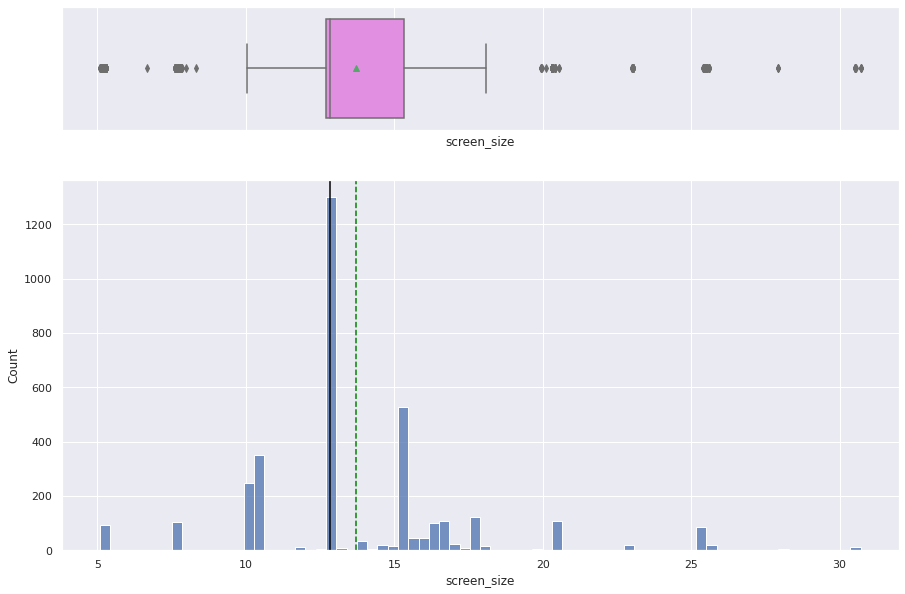

In [ ]:
# provides a histogram and box plot of our variable

histogram_boxplot(data, "screen_size")



*   There are many outliers in our screen size data; having both phones and tablets in our data set likely contributes to the large amount of variation
*   The median and mean screen size are approximately 13 cm with the mean sligtly greater than the median



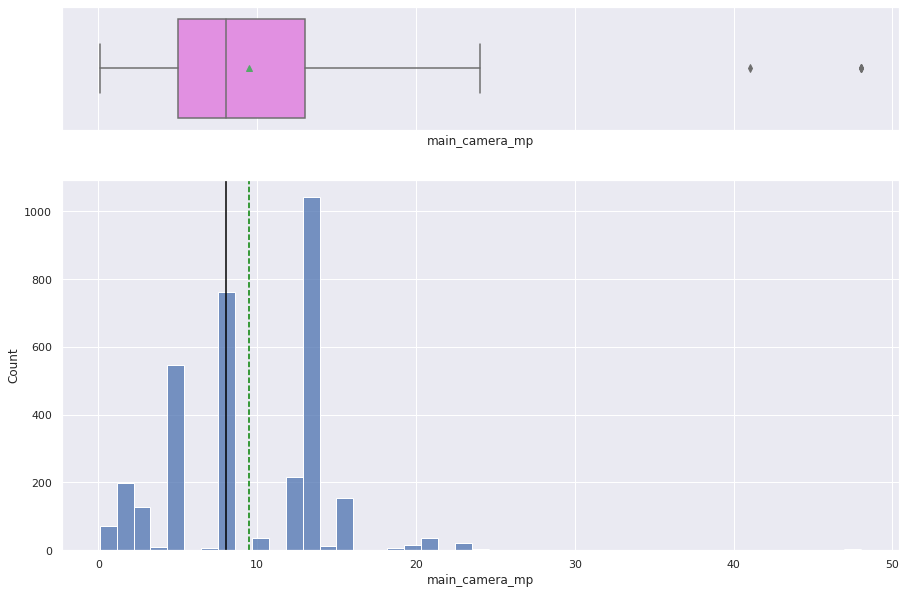

In [ ]:
# provides a histogram and box plot of our variable

histogram_boxplot(data, "main_camera_mp")



*   There are two outliers on the end of our main camera data
*   The mean and median are similar at just under 10 megapixels
*   A large number of devices have approximately 13 megapixels





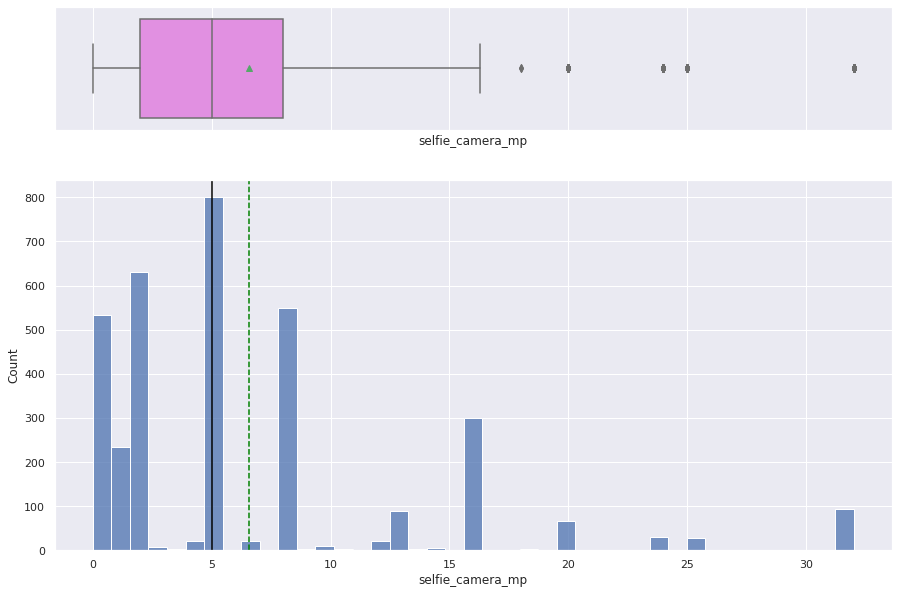

In [ ]:
# provides a histogram and box plot of our variable

histogram_boxplot(data, "selfie_camera_mp")



*   There are a handful of outliers on the upper end of our selfie camera data



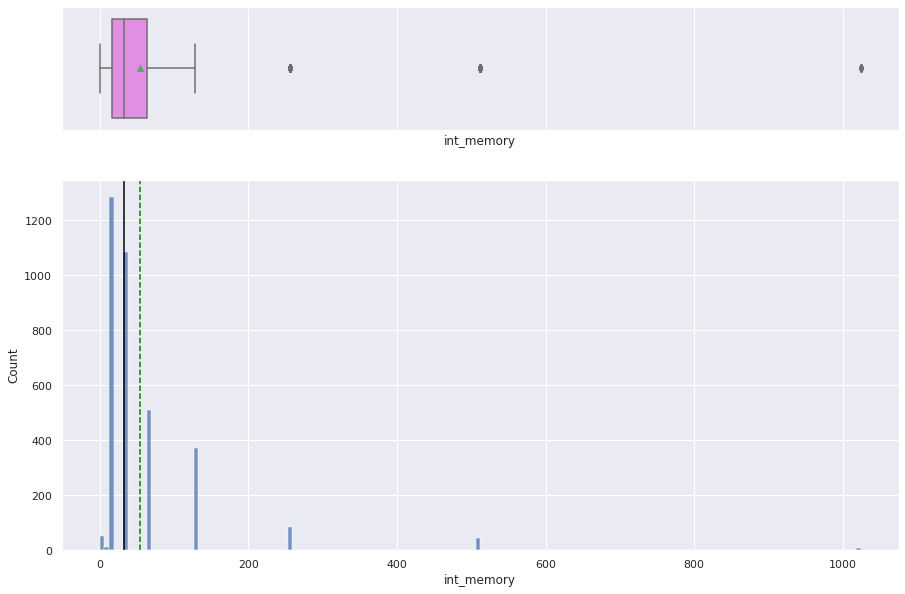

In [ ]:
# provides a histogram and box plot of our variable

histogram_boxplot(data, "int_memory")



*   Most devices have under 200 GB of memory
*   There are a handful of outliers where devices have more than 200 GB of memory



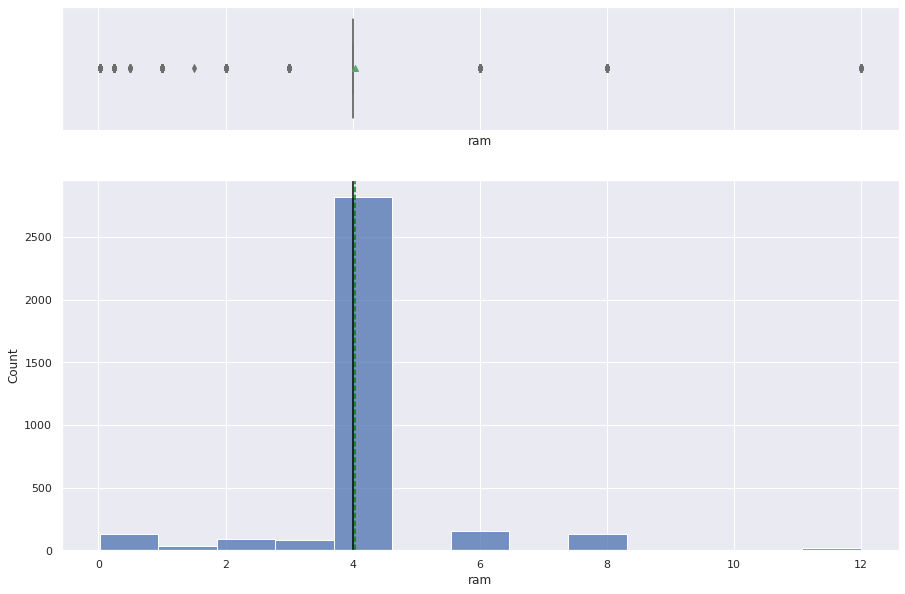

In [ ]:
# provides a histogram and box plot of our variable

histogram_boxplot(data, "ram")



*  A vast majority of our devices have 4GB of RAM
*  Any device that doesn't have 4GB of RAM is considered an outlier



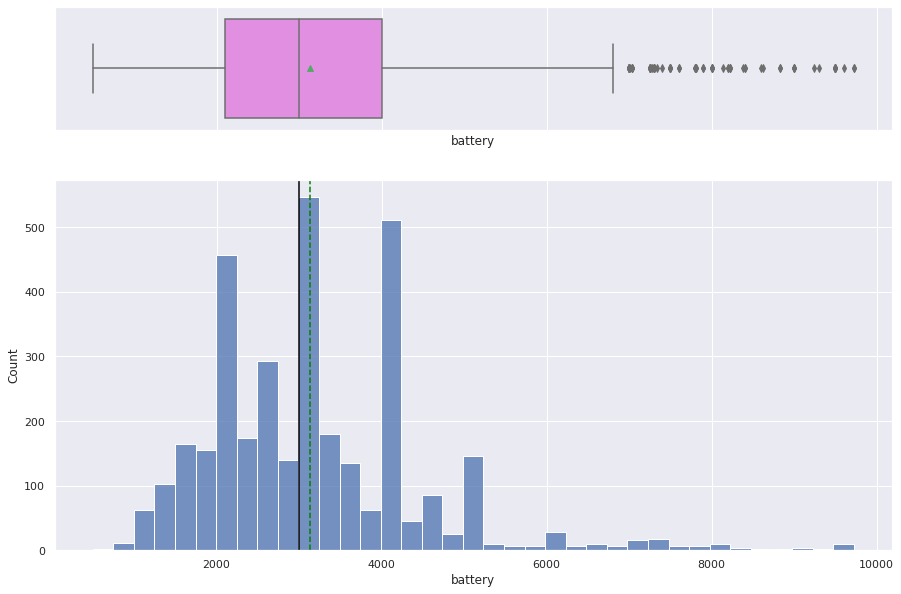

In [ ]:
# provides a histogram and box plot of our variable

histogram_boxplot(data, "battery")



*   Battery data is significantly skewed to the right
*   Most of the devices have batteries less than 6000 mAh



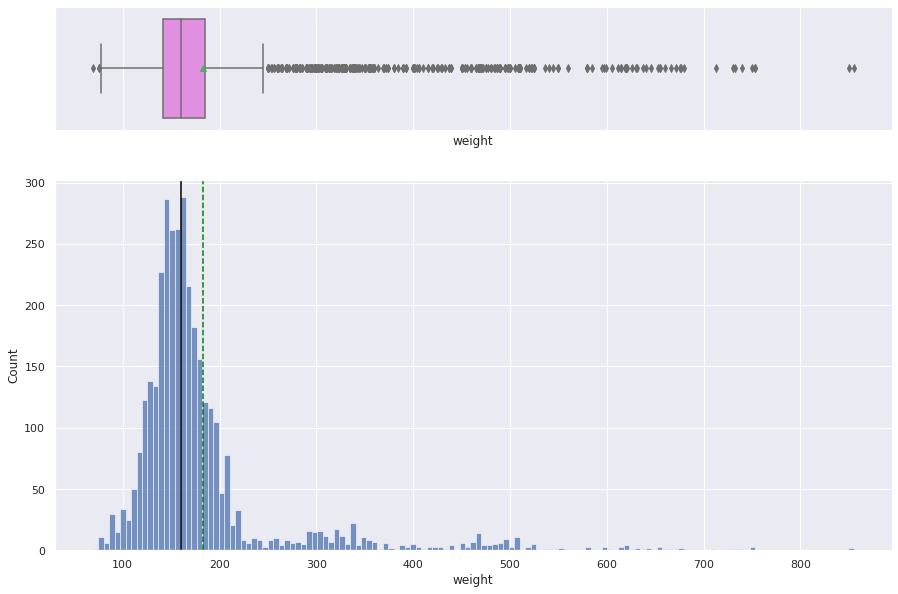

In [ ]:
# provides a histogram and box plot of our variable

histogram_boxplot(data, "weight")

*   Weight data is significantly skewed to the right
*   Most of the devices weigh less than 25 grams

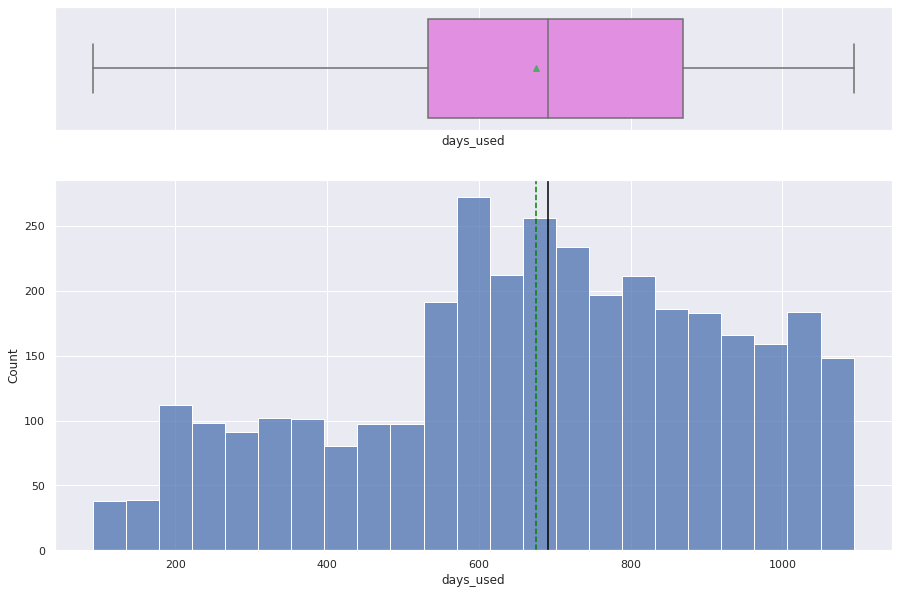

In [ ]:
# provides a histogram and box plot of our variable

histogram_boxplot(data, "days_used")



*   Days used data is slightly skewed to the left
*   There are no outliers





**What does the distribution of normalized used device prices look like?**

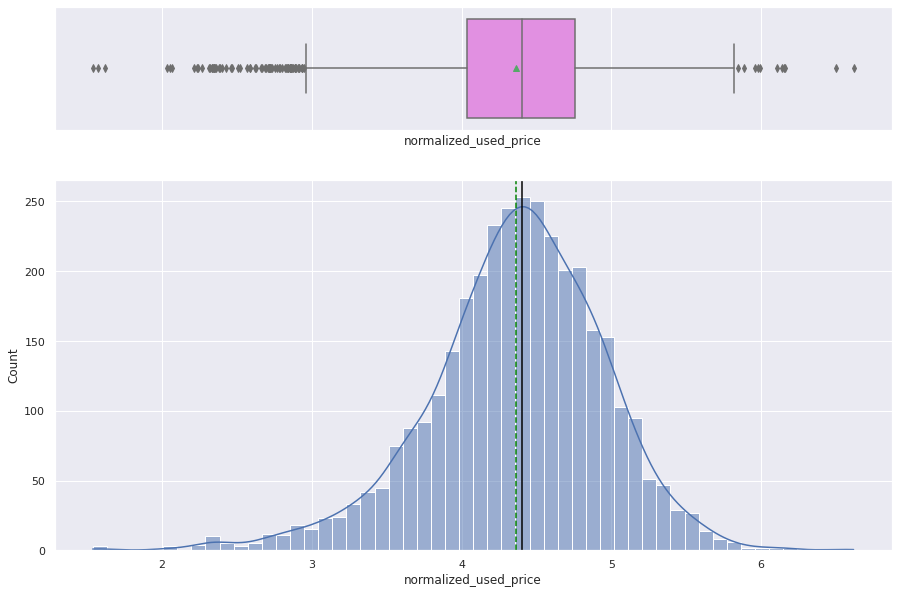

In [ ]:
# provides a histogram and box plot of our variable

histogram_boxplot(data, "normalized_used_price", kde =True)



*   Used prices kde resembles a bell shaped curve and resembles a normal distribution



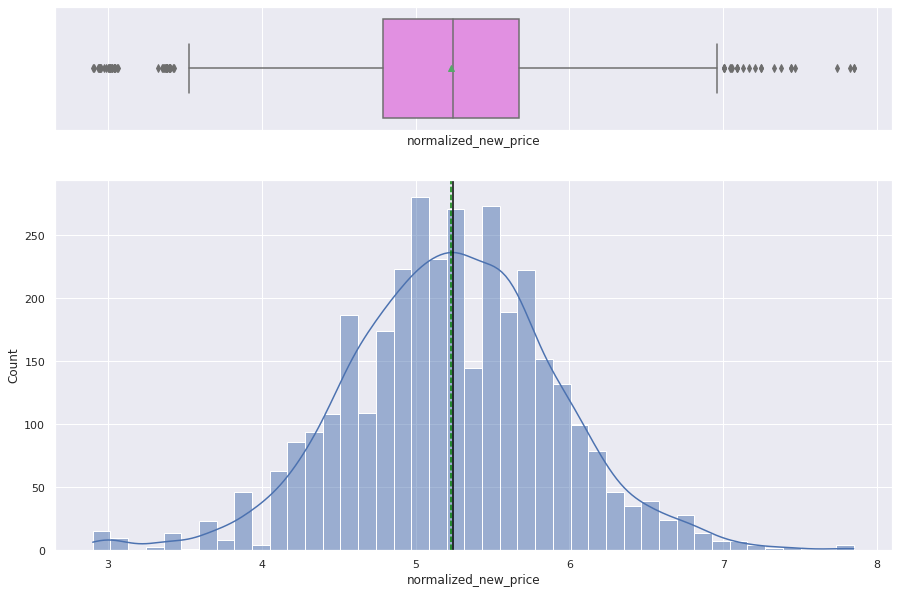

In [ ]:
# provides a histogram and box plot of our variable

histogram_boxplot(data, "normalized_new_price", kde =True)



*   New prices kde likewise resembles a bell shaped curve and normal distribution



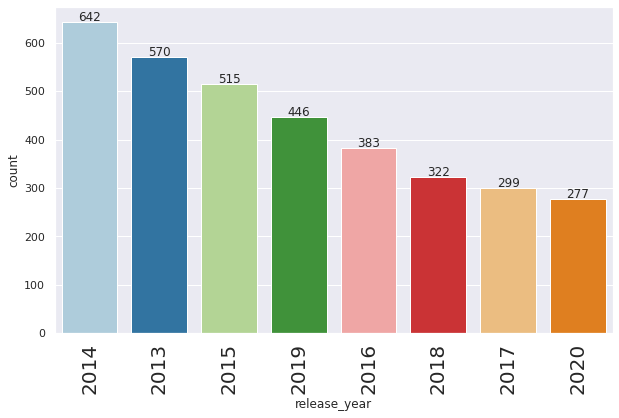

In [ ]:
# provides a bar plot of our variable

labeled_barplot(data, "release_year")



*   As release year increased, the count for each column decreases



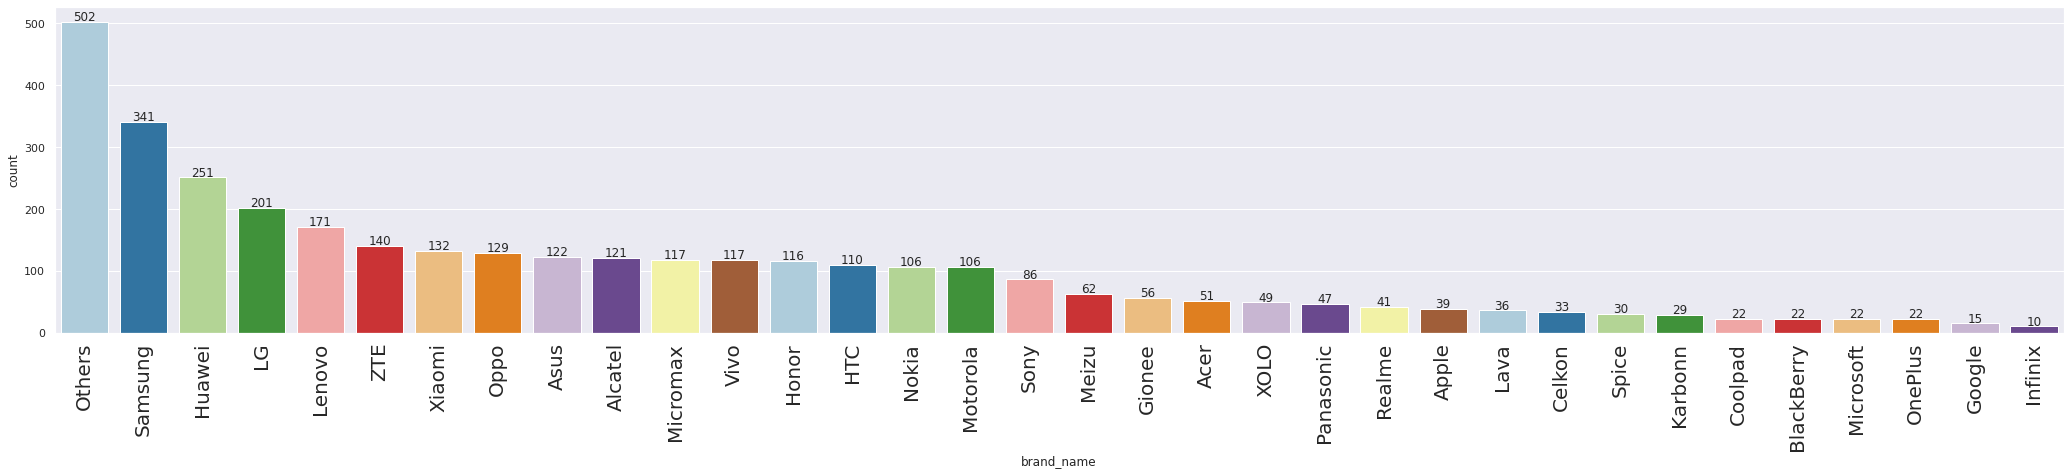

In [ ]:
# provides a bar plot of our variable

labeled_barplot(data, "brand_name")



*   'Other' is the most common category in 'brand_name'
*   The brand names with the highest frequency in our data set are Samsung, Huawei, LG and Lenovo, respectively.






**What percentage of the used device market is dominated by Android devices?**

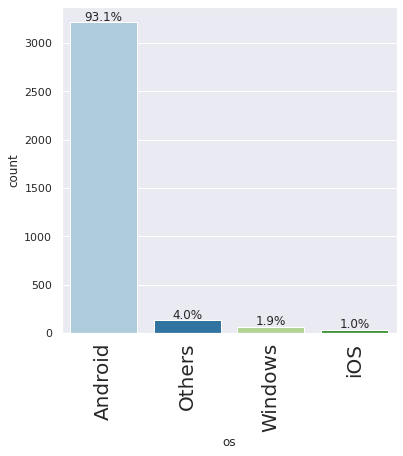

In [ ]:
# provides a histogram and box plot of our variable

labeled_barplot(data, "os", perc = True)



*   93.1% of the used device market is dominated by Android devices



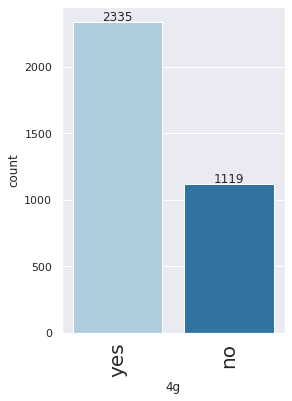

In [ ]:
# provides a histogram and box plot of our variable

labeled_barplot(data, "4g")



*   There are approximately twice as many devices in our data set that have 4g than those that do not



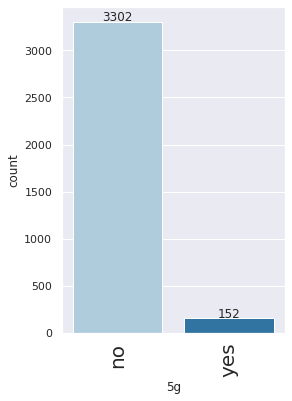

In [ ]:
# provides a histogram and box plot of our variable

labeled_barplot(data, "5g")



*   The vast majority of devices in our data set do not have 5g



### Bivariate Analysis

Which attributes are highly correlated with the normalized price of a used device?

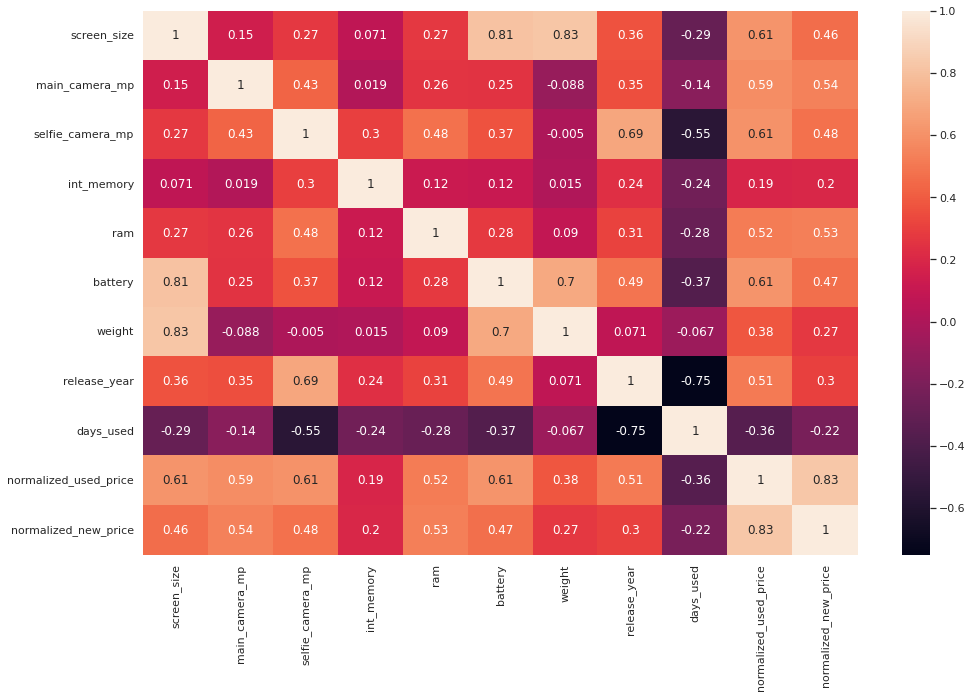

In [ ]:
# plots a heatmap of the numerical data
plt.figure(figsize=(16,10))
sns.heatmap(data=data[['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']].corr(), annot=True, cbar=True);



*   The strongest positve correlations occur between "normalized_used_price & normalized new price" and "weight & screen_size" 
*   The strongest negative correlations occur between "release_year & days_used" and "days_used & selfie_camera_mp" 



**The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

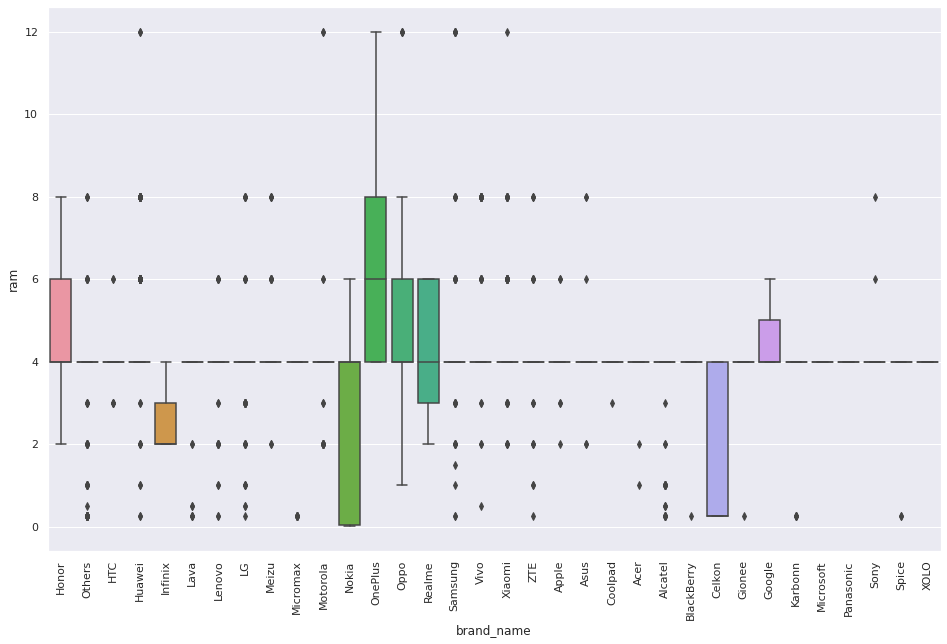

In [ ]:
# provides a box plot comparing ram for each brand
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='brand_name', y = 'ram');



*   Most brands have devices where the RAM is nearly exclusively 4GB
*   Honor, OnePlus and Google are brands where a significant portion of devices have RAM greater than 4GB 
*   Infinix, Nokia and Celkon are brands where a significant portion of devices have RAM less than 4GB 





**A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [ ]:
# creates a data frame with large batteries
heavy_phone_data = data[data['battery'] > 4500]
heavy_phone_data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001


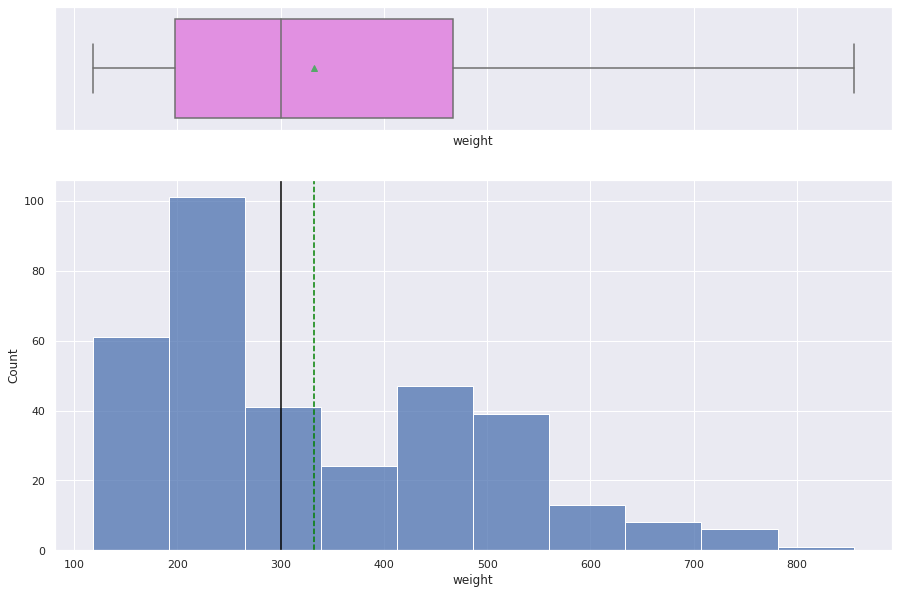

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(heavy_phone_data, 'weight')



*   The data of the weight of devices with large batteries is significantly skewed to the right



**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [ ]:
# creates a data frame with large screen sizes
large_screen_data = data[(data['screen_size'] / 2.54) > 6 ]
large_screen_data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694


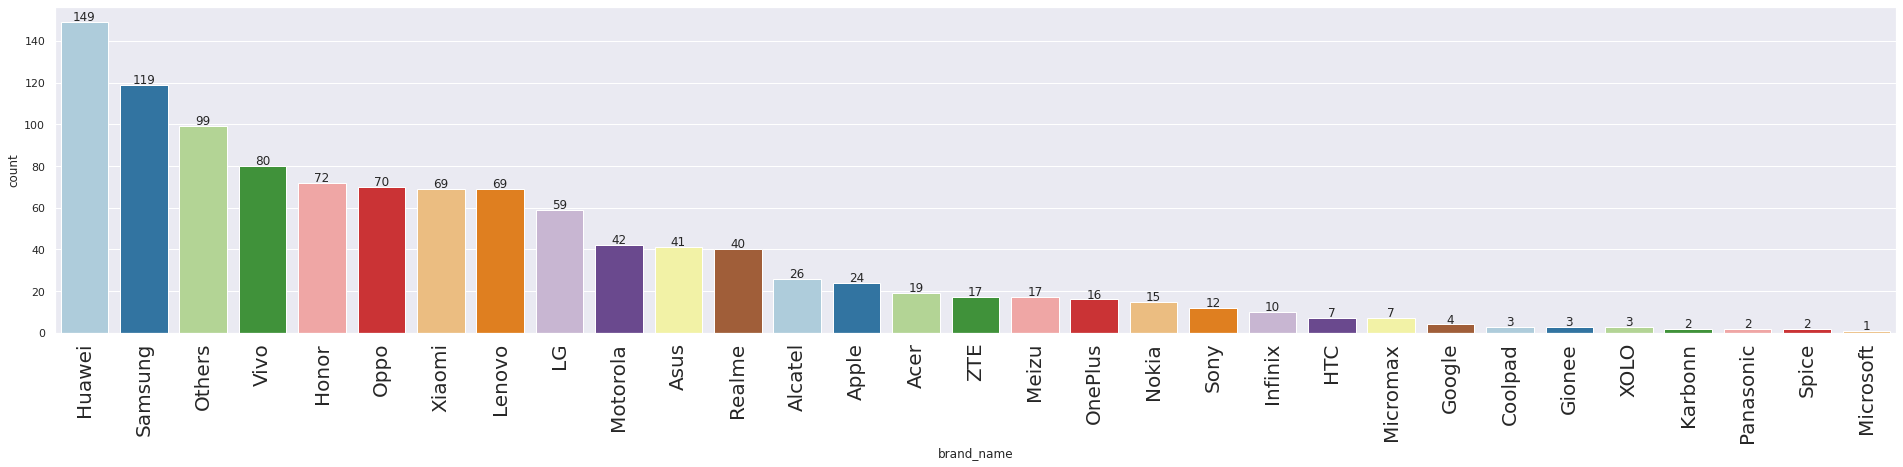

In [ ]:
# provides a bar plot of our variable

labeled_barplot(large_screen_data, "brand_name")



*   The brands with the highest count of large screen sizes are Huawei, Samsung and Vivo, respectively.







**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [ ]:
# creates a data frame of selfie cameras with more than 8 MP
large_selfie_data = data[data['selfie_camera_mp'] > 8 ]
large_selfie_data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,5.383256,6.213968
13,Honor,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,2019,336,4.617593,5.398751
16,Honor,Android,15.90,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,395,5.022366,5.517935


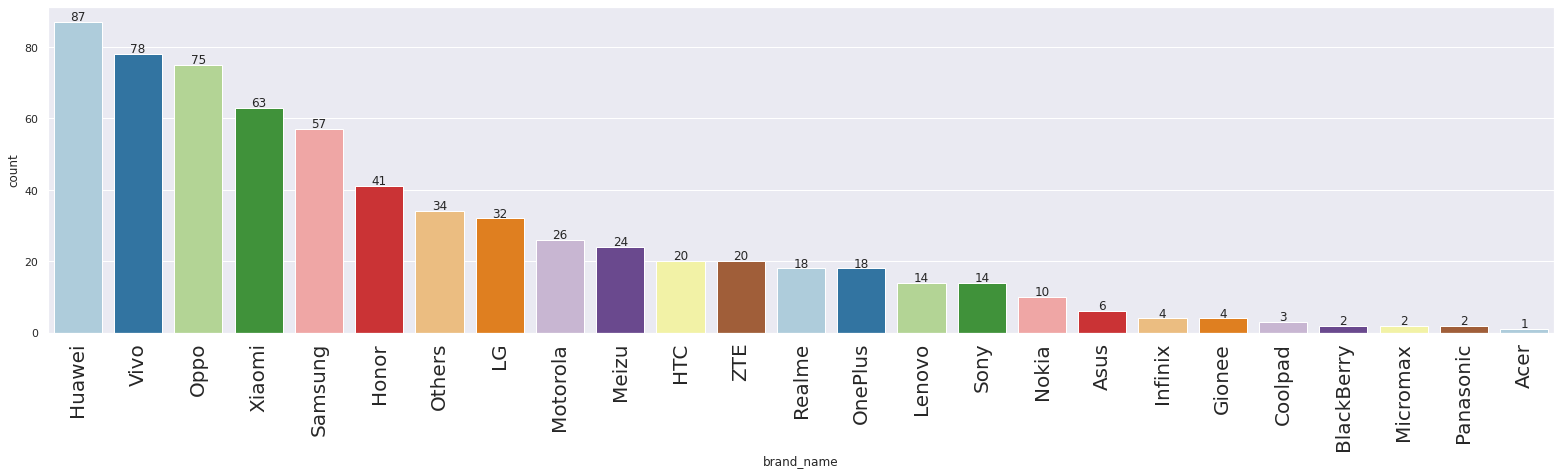

In [ ]:
# provides a bar plot of brand names for cameras with high selfie camera mp
labeled_barplot(large_selfie_data, "brand_name")

*   The brands with the highest count of high MP selfie cameras are Huawei, Vivo and Oppo, respectively.


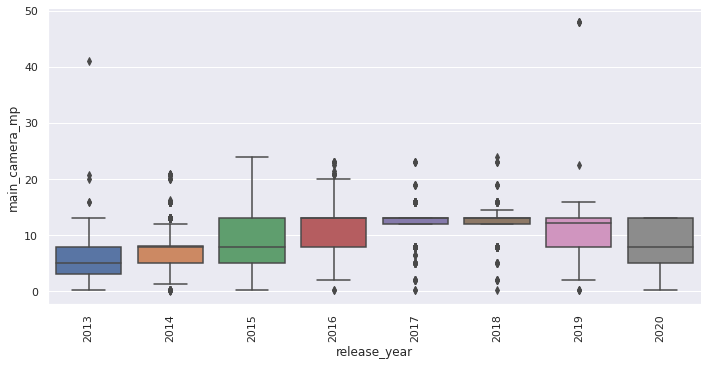

In [ ]:
# provides a box plot comparing main camera mp for each release year
a= sns.catplot(data=data, x='release_year', y = 'main_camera_mp', kind = 'box', height=5, aspect=2)
a.set_xticklabels(rotation=90);

*   Significant variability in main camera megapixels 
*   Some box plots have relatively large ranges; however, most box plots are relatively short
*   The relatively high inter-year variabilty and relatively low intra-year variability indicates release_year will be valuable to treat missing main camera data


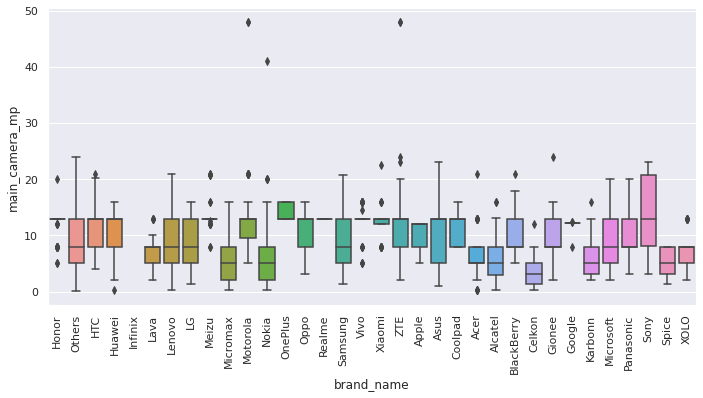

In [ ]:
# provides a box plot comparing main camera mp for brand name
a= sns.catplot(data=data, x='brand_name', y = 'main_camera_mp', kind = 'box', height=5, aspect=2)
a.set_xticklabels(rotation=90);



*   Significant variability in main camera megapixels between brands
*   Some box plots have relatively large ranges; however, most box plots are relatively short
*   The relatively high inter-brand variabilty and relatively low intra-brand variability indicates brand_name will be valuable when grouping to treat missing main camera data
*   Brand name will take priority over release year when grouping because there are more categories which will likely lead to more specific/accurate filling of missing values











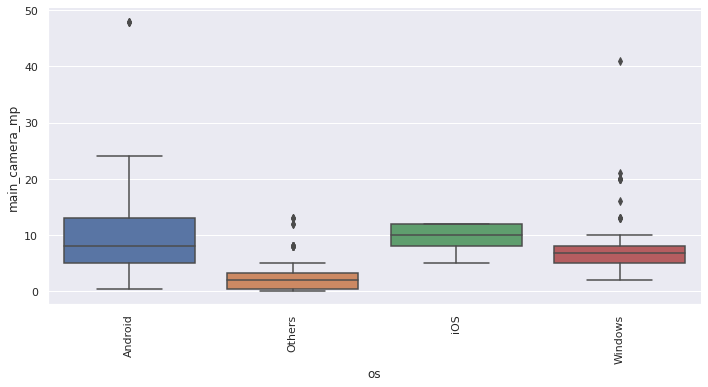

In [ ]:
# provides a box plot comparing main camera mp for each os
a= sns.catplot(data=data, x='os', y = 'main_camera_mp', kind = 'box', height=5, aspect=2)
a.set_xticklabels(rotation=90);



*   The relatively high variability within the Android, Others and Windows category makes the os column less valuable when grouping to treat missing main camera data
*   Similarly, because there are so few categories (4) relative to release year (8) and brand_name (34) , we would get a less specific treatment of missing values in our groupby method





## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [ ]:
# returns the sum of the null values for each column
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

*   We have missing values for 6 categories with the most data missing from the 'main_camera_mp' category.


In [ ]:
# creates a copy of the data to avoid changes to it
data1 = data.copy()

In [ ]:
# returns the first 10 median values for columns with missing values, grouped by brand name and release year
data1.groupby(["brand_name" , "release_year"])[["main_camera_mp","selfie_camera_mp","int_memory", "ram", "battery","weight"]].median().head(10)

main_camera_mp  selfie_camera_mp  int_memory  ram  \
brand_name release_year                                                      
Acer       2013                     5.0               0.3        16.0  4.0   
           2014                     5.0               2.0        16.0  4.0   
           2015                     5.0               2.0        32.0  4.0   
           2016                    10.5               3.5        24.0  4.0   
           2018                     5.0               2.0        32.0  4.0   
Alcatel    2013                     5.0               0.3        16.0  4.0   
           2014                     5.0               0.3        16.0  4.0   
           2015                     5.0               2.0        16.0  4.0   
           2016                     8.0               5.0        32.0  4.0   
           2017                    12.0               5.0        32.0  4.0   

                         battery  weight  
brand_name release_year                   
Acer       2013           2400.0  195.00  
           2014           2700.0  159.50  
           2015           2360.0  145.00  
           2016           3740.0  147.50  
           2018           4500.0  544.30  
Alcatel    2013           1800.0  130.00  
           2014           2000.0  129.00  
           2015           2820.0  142.95  
           2016           2580.0  159.95  
           2017           2825.0  159.50

In [ ]:
# returns the last 10 median values for columns with missing values, grouped by brand name and release year
data1.groupby(["brand_name" , "release_year"])[["main_camera_mp","selfie_camera_mp","int_memory", "ram", "battery","weight"]].median().tail(10)

main_camera_mp  selfie_camera_mp  int_memory  ram  \
brand_name release_year                                                      
Xiaomi     2019                    12.0              20.0        64.0  4.0   
           2020                     NaN              16.0        64.0  6.0   
ZTE        2013                     8.0               1.0        16.0  4.0   
           2014                     8.0               5.0        16.0  4.0   
           2015                     8.0               5.0        32.0  4.0   
           2016                    13.0               5.0        32.0  4.0   
           2017                    13.0               8.0        32.0  4.0   
           2018                    14.5               8.0        64.0  4.0   
           2019                    14.5               8.0        32.0  3.0   
           2020                     NaN              12.0       128.0  7.0   

                         battery  weight  
brand_name release_year                   
Xiaomi     2019           4000.0  189.50  
           2020           4780.0  208.00  
ZTE        2013           2000.0  140.00  
           2014           2300.0  135.55  
           2015           2400.0  149.50  
           2016           3000.0  160.00  
           2017           3100.0  164.00  
           2018           3800.0  172.00  
           2019           3200.0  165.00  
           2020           4800.0  212.50



*   We see significant differences in median values grouped by brand name and release year



In [ ]:
# imputes the median of missing values grouped by brand name and release year
data1["main_camera_mp"] = data1["main_camera_mp"].fillna(
    value=data1.groupby(["brand_name" , "release_year"])["main_camera_mp"].transform("median")
)
data1["selfie_camera_mp"] = data1["selfie_camera_mp"].fillna(
    value=data1.groupby(["brand_name" , "release_year"])["selfie_camera_mp"].transform("median")
)
data1["int_memory"] = data1["int_memory"].fillna(
    value=data1.groupby(["brand_name" , "release_year"])["int_memory"].transform("median")
)
data1["ram"] = data1["ram"].fillna(
    value=data1.groupby(["brand_name" , "release_year"])["ram"].transform("median")
)
data1["battery"] = data1["battery"].fillna(
    value=data1.groupby(["brand_name" , "release_year"])["battery"].transform("median")
)
data1["weight"] = data1["weight"].fillna(
    value=data1.groupby(["brand_name" , "release_year"])["weight"].transform("median")
)

data1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64



*   Values were grouped by brand name and release year for reasons detailed at the end of the Bivariate Analysis section
*   A handful of missing values were treated; however there are still 179 null values for the main camera column



In [ ]:
# imputes the median of missing values grouped by brand name
data1["main_camera_mp"] = data1["main_camera_mp"].fillna(
    value=data1.groupby(["brand_name"])["main_camera_mp"].transform("median")
)
data1["selfie_camera_mp"] = data1["selfie_camera_mp"].fillna(
    value=data1.groupby(["brand_name"])["selfie_camera_mp"].transform("median")
)
data1["int_memory"] = data1["int_memory"].fillna(
    value=data1.groupby(["brand_name"])["int_memory"].transform("median")
)
data1["battery"] = data1["battery"].fillna(
    value=data1.groupby(["brand_name"])["battery"].transform("median")
)
data1["weight"] = data1["weight"].fillna(
    value=data1.groupby(["brand_name"])["weight"].transform("median")
)

data1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64


*   Values were grouped by brand name for reasons detailed at the bottom of the Bivariate Analysis section
*   Most missing values have been treated; however there are still 10 null values for the main camera column



In [ ]:
# treats the missing values with the median of the main_camera_mp column
data1["main_camera_mp"] = data1["main_camera_mp"].fillna(data1["main_camera_mp"].median())
data1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64



*   After treating the last missing values with the median of the main camera mp category we no longer have any missing values



### Feature Engineering

In [ ]:
# replaces a "release year" category with a "years old" category
data1["years_old"] = 2021 - data1["release_year"]
data1.drop("release_year", axis=1, inplace=True)



*   Values 1-8 are simpler for our linear regression model than 2013-2020



In [ ]:
# returns the first 5 rows of our updated data frame
data1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_old
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1




*   We can see that we effectively replaced our release year column with a years old column



### Outlier Detection

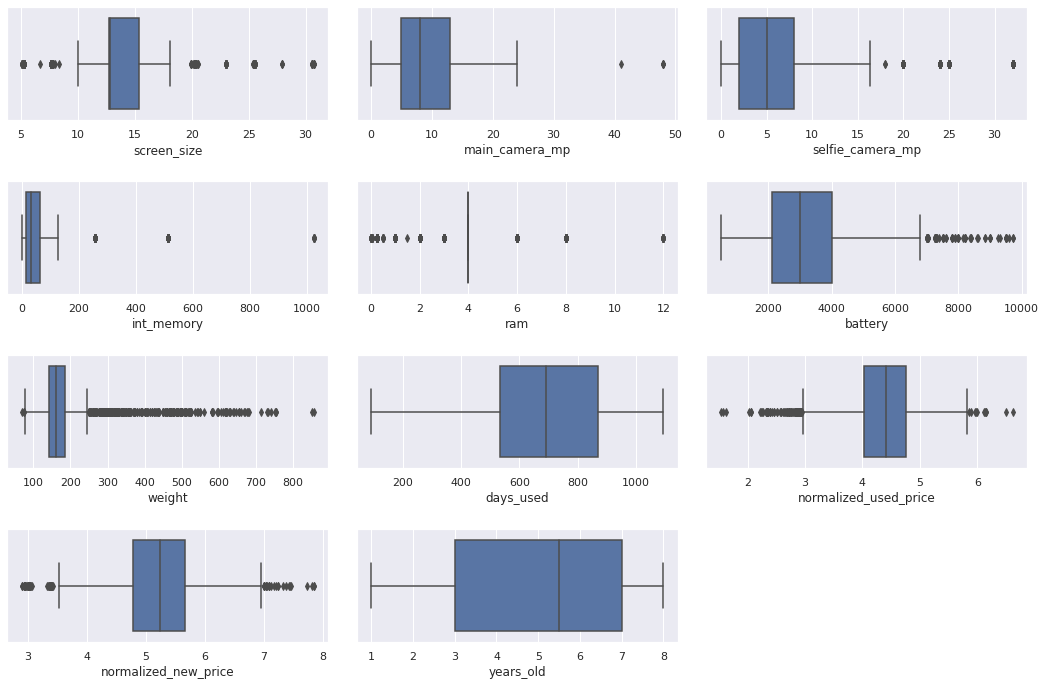

In [ ]:
# outlier detection using boxplot
num_cols = data1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are quite a few outliers in the data
- However, we will not treat them as they are proper values

## EDA

- Additional EDA to explore the data once after manipulating it.

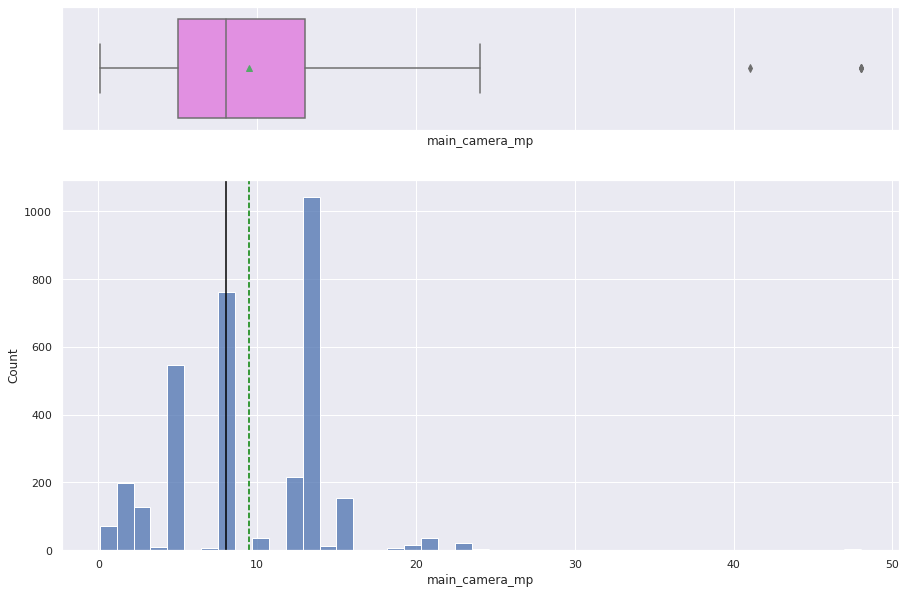

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data, "main_camera_mp")

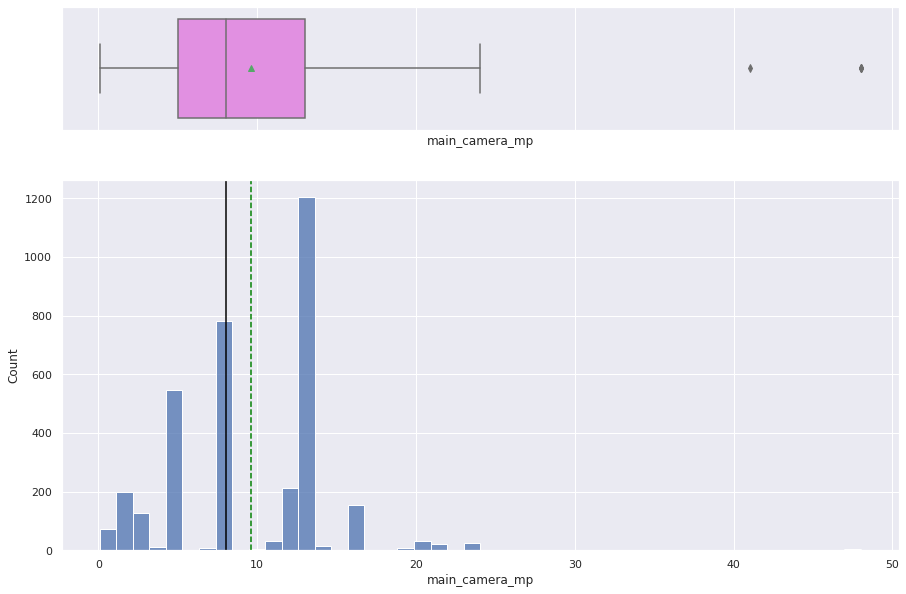

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data1, "main_camera_mp")



*   We can see that missing value treatment did not significantly affect the distribution of main_camera_mp data, which is good.



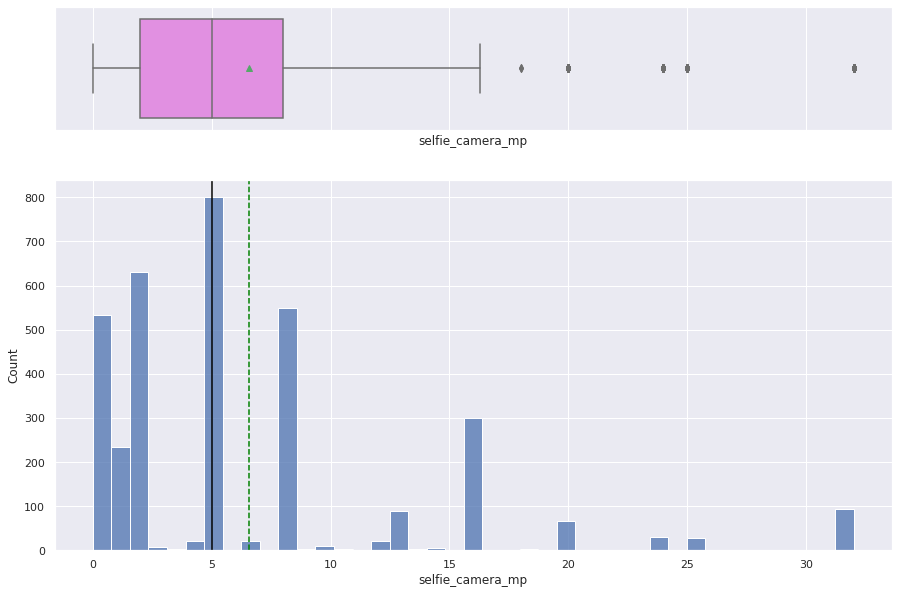

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data, "selfie_camera_mp")

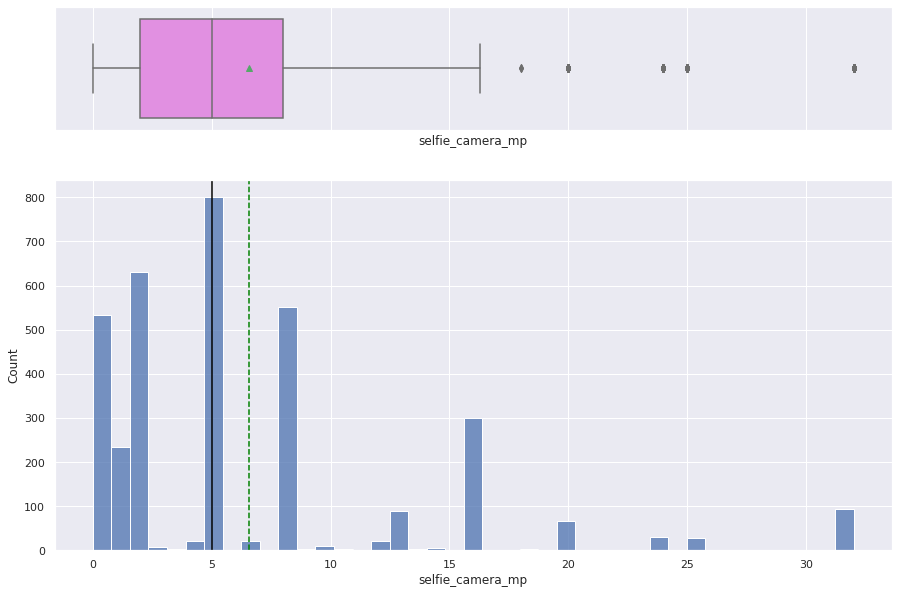

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data1, "selfie_camera_mp")

*   We can see that missing value treatment did not significantly affect the distribution of selfie_camera_mp data, which is good.

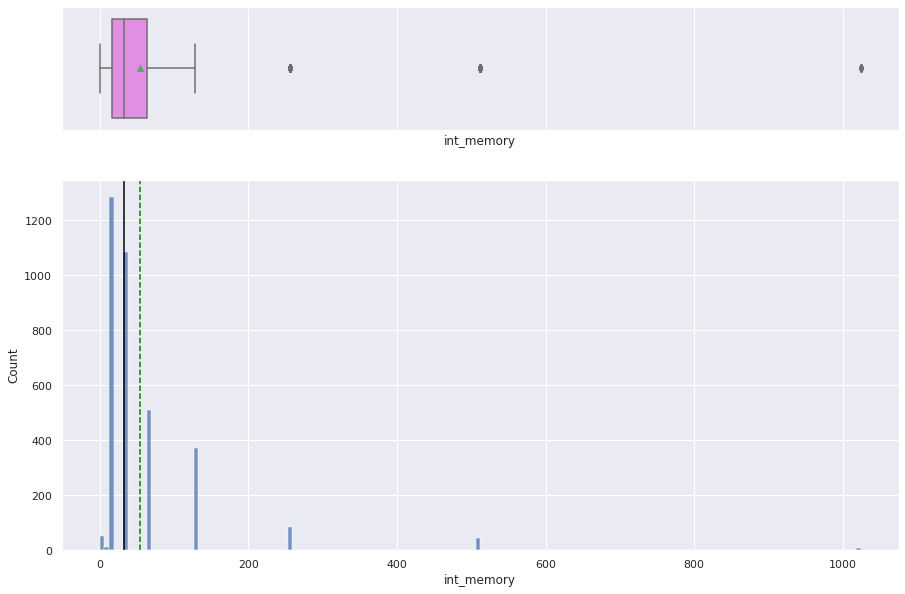

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data, "int_memory")

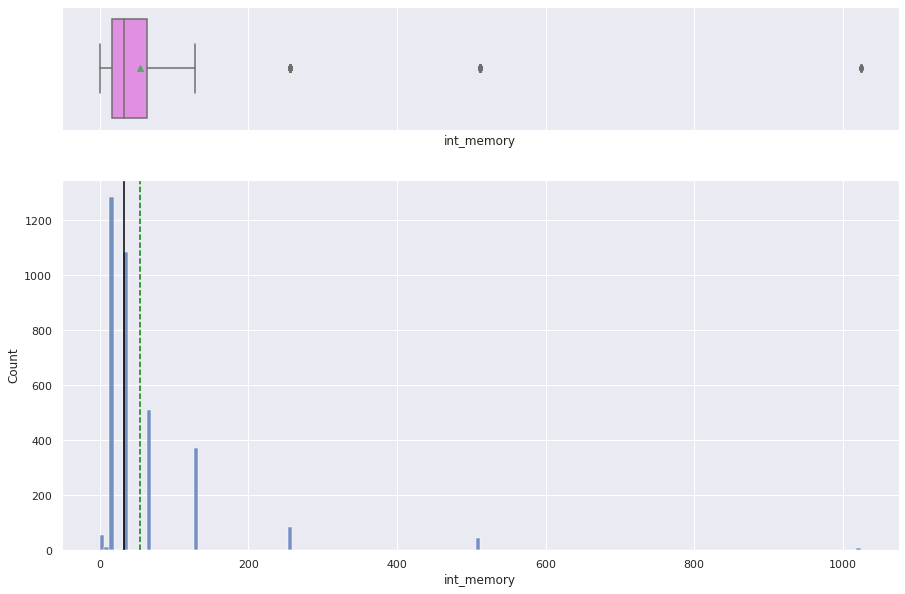

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data1, "int_memory")

*   We can see that missing value treatment did not significantly affect the distribution of int_memory data, which is good.

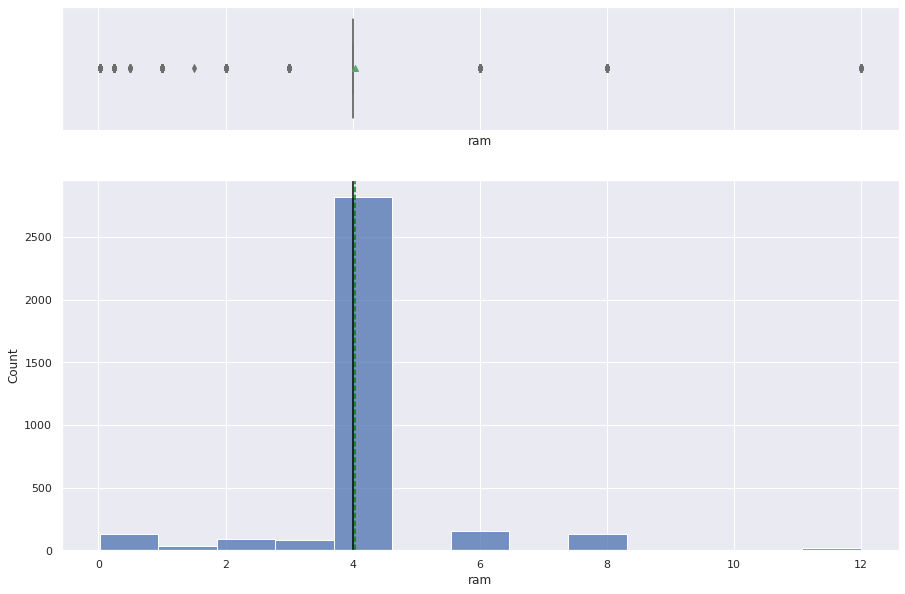

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data, "ram")

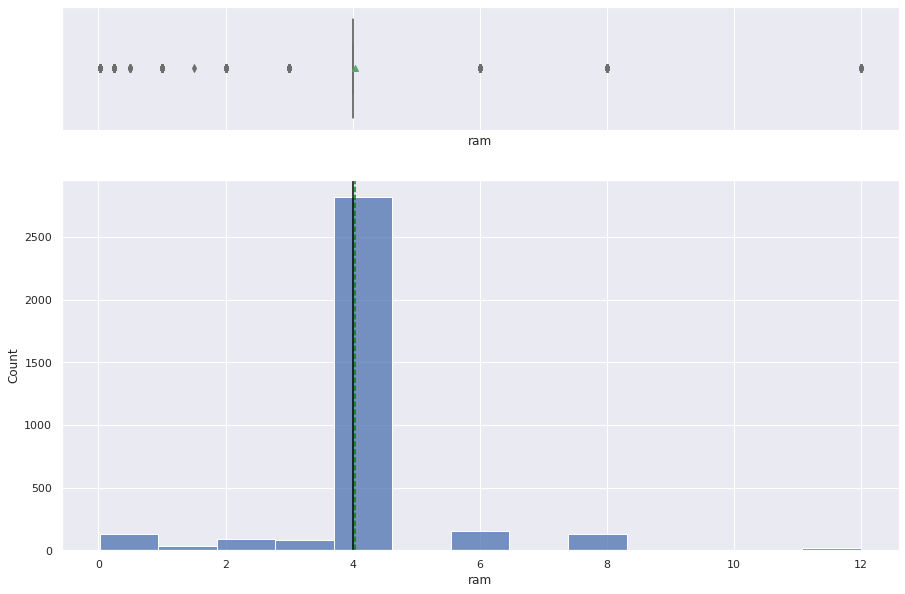

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data1, "ram")

*   We can see that missing value treatment did not significantly affect the distribution of ram data, which is good.

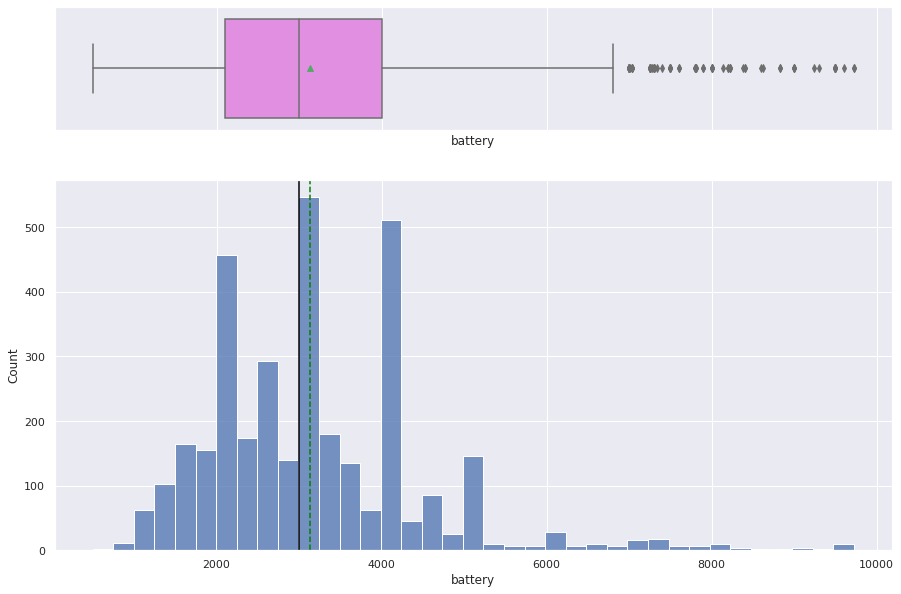

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data, "battery")

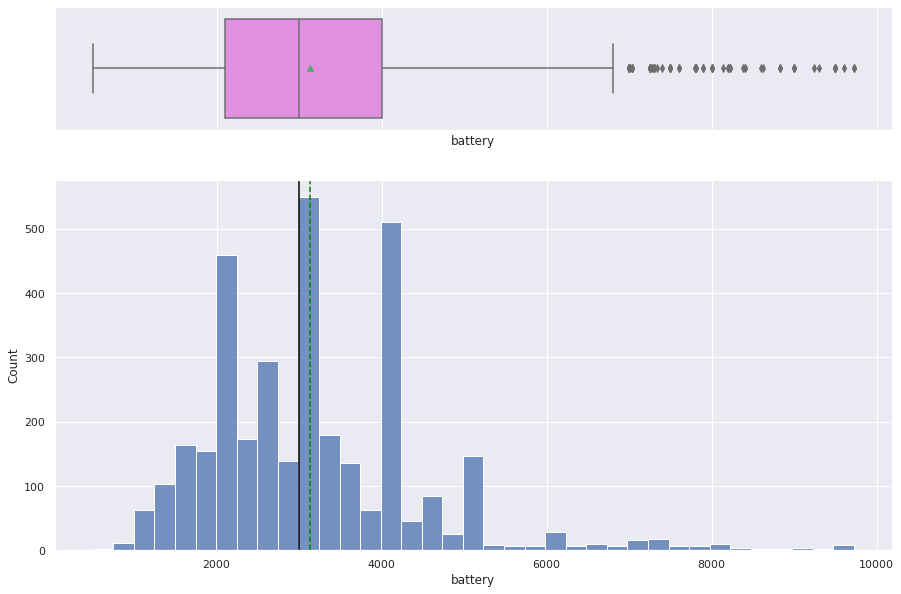

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data1, "battery")

*   We can see that missing value treatment did not significantly affect the distribution of battery data, which is good.

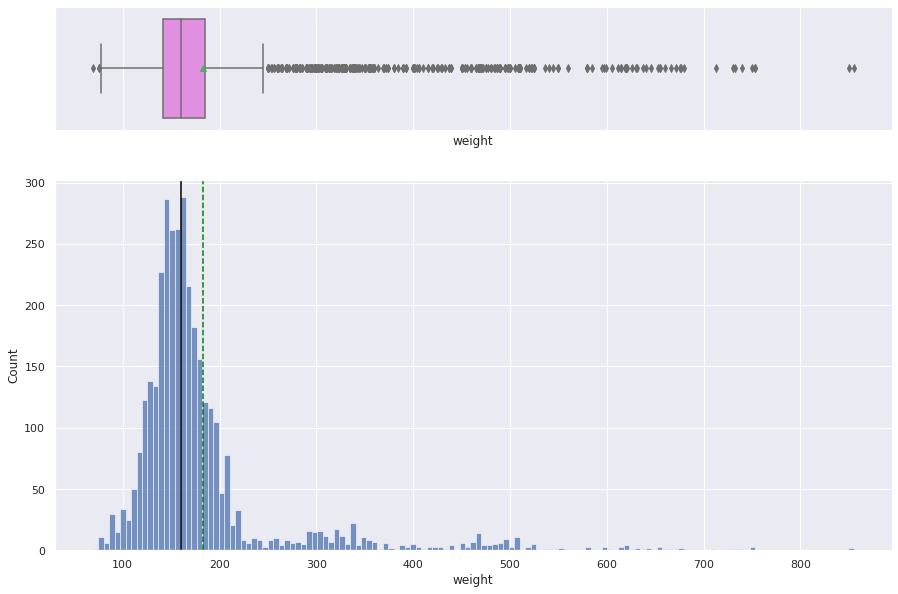

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data, "weight")

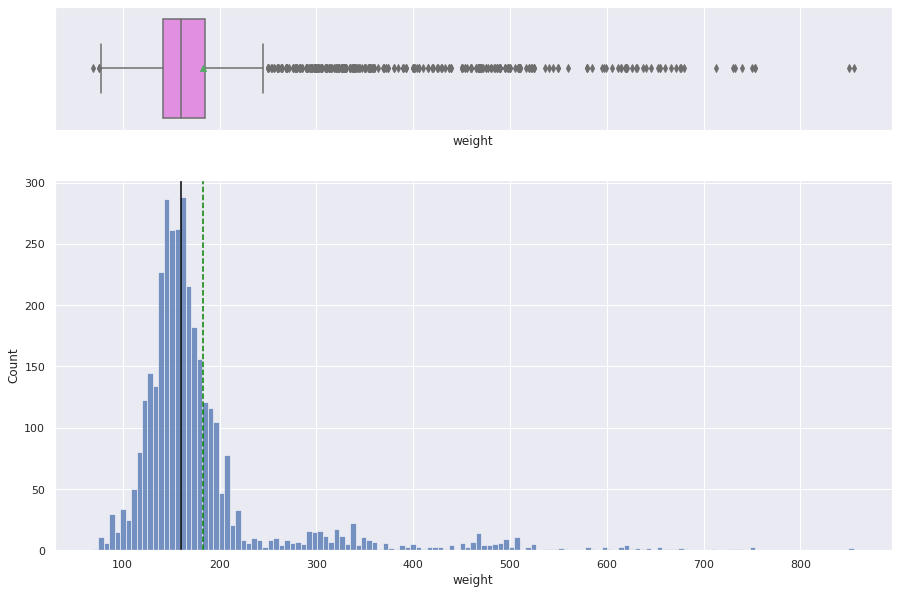

In [ ]:
# provides a histogram and box plot of our variable
histogram_boxplot(data1, "weight")

*   We can see that missing value treatment did not significantly affect the distribution of weight data, which is good.

## Model Building - Linear Regression

In [ ]:
# defining X and y variables
X = data1.drop(["normalized_used_price"], axis=1)
y = data1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_old  
0              4.715100          1  
1              5.519018          1  
2              5.884631          1  
3              5.630961          1  
4              4.9478

In [ ]:
# adds a constant column
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# returns the number of rows in the train and test data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [ ]:
# creates a linear regression model 
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                           23:50:21   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------





*   According to our $R^2$, 85% of the variability is explained by our model
*   Our constant coefficient (Y-intercept) is 1.32 




## Model Performance Check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

*   The $R^2$ of .845 indicates our model is not underfitting
*   The train and test RMSE and MAE are comparable, so the model is not overfitting either
*   The MAE suggests that the model, on average, predicts a mean error of only 0.18 on the test data
*   The MAPE on the test set suggests our predictions, on average, are only 4.5% different than the actual used phone/tablet price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [ ]:
#Function to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
# checks the VIF
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity we will:

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.


In [ ]:
# function to help remove multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
# helps determine which column to drop
col_list = ['screen_size', 'weight']

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [ ]:
# drops the screen size column
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_old,4.730315


* We have dealt with multicollinearity in the data

In [ ]:
# rebuilds a new model after multicollinearity has been removed
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                           23:50:22   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- We can see that adj. R-squared has dropped from 0.832 to 0.828, which shows that the dropped columns did not have much effect on the model
- As there is now no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables

- Some of the variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05


In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_old', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
# creates a new train and test set with the selected features
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
# creates an updated linear model
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                           23:50:23   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.838, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.842
    * This shows that the variables we dropped were not significantly affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### TEST FOR LINEARITY AND INDEPENDENCE

- We will make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


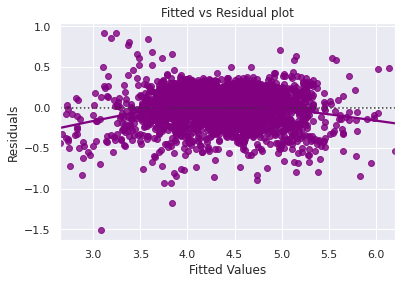

In [ ]:
# provides the fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**
 
*   We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied



### TEST FOR NORMALITY

* The shape of the histogram of residuals will give us an initial idea about the normality.
* It will also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

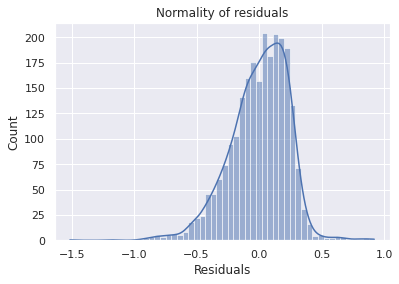

In [ ]:
# returns a histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals more or less has a bell shape.

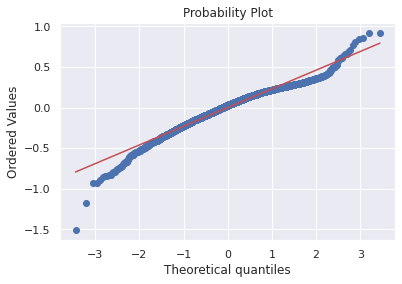

In [ ]:
# provides the Q-Q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.

In [ ]:
# returns the shapiro result
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995328206686811e-23)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY


* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

In [ ]:
# returns the F statistic and p-value for our training data
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.008750419910676), ('p-value', 0.4401970650667301)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Final Model

In [ ]:
# creates a copy of the data to avoid changes to it
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
# creates a linear regression model 
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                           23:50:25   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests our predictions, on average, are only 4.6% different than the actual used phone/tablet price

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1. The model is able to explain ~84% of the variation in the data and our predictions, on average, are only 4.6% different than the actual price, which is good
    - This indicates that the model is good for prediction as well as inference purposes
 
2. If the normalized new price increases by one unit, then the normalized used price increases by 0.0123 units, when all other variables are held constant

3. If the main camera megapixels or selfie camera megapixels are increased by one unit, then the normalized used prices increase by 0.0210 units and 0.0138 units respectively, when all other variables are held constant

4. Devices with the brand names Karbonn and Xiaomi increase the value of used prices while devices with the brand names Samsung and Sony decrease the value of used prices.

5. If Re-Cell would like to sell used devices and maximize profit, they should consider the following: 
*   focus on devices that have high normalized new prices
*   focus on devices that have a high number of megapixels for both the    main and selfie camera
*   focus on devices with the brand names Karbonn and Xiaomi
*   avoid devices with the brand names Samsung and Sony




___

In [ ]:
!jupyter nbconvert --to html /content/Klussmann_SupervisedLearning_ReCell.ipynb

[NbConvertApp] Converting notebook /content/Klussmann_SupervisedLearning_ReCell.ipynb to html
[NbConvertApp] Writing 1777261 bytes to /content/Klussmann_SupervisedLearning_ReCell.html
